# 1. Importing Data

In [31]:
#importing packages
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.1. Unifying the length of the rows

In [32]:
# Data for Food Supply (kilocalories)
calories= pd.read_csv('../dataproject/food_supply_kilocalories_per_person_and_day.csv')
calories.drop(calories.columns[1:35], axis = 1, inplace = True)
calories.drop(calories.columns[-3:], axis = 1, inplace = True)
n_calories = calories.copy()

In [33]:
# Data for GDP total ($)
gdp= pd.read_csv('../dataproject/total_gdp_us_inflation_adjusted (1).csv')
gdp.drop(gdp.columns[1:36], axis = 1, inplace = True)
gdp.drop(gdp.columns[-7:], axis = 1, inplace = True)
n_gdp = gdp.copy()

In [34]:
# Data for GDP per Capita ($)
gdpc = pd.read_csv('../dataproject/gdppercapita_us_inflation_adjusted.csv')
gdpc.drop(gdpc.columns[1:36], axis = 1, inplace = True)
gdpc.drop(gdpc.columns[-7:], axis = 1, inplace = True)
n_gdpc= gdpc.copy()

In [35]:
# Data for Health Spending (%)
hspend= pd.read_csv('../dataproject/total_health_spending_percent_of_gdp.csv')

## 1.2. Renaming variables

In [36]:
#Change variables for years
myDictC = {}
for i in range(1995, 2011):
    myDictC[str(i)] = f'c{i}'
n_calories.rename(columns = myDictC, inplace=True)
myDictG = {}
for i in range(1995, 2011):
    myDictG[str(i)] = f'g{i}'
n_gdp.rename(columns = myDictG, inplace = True)
myDictH = {}
for i in range(1995, 2011):
    myDictH[str(i)] = f'h{i}'
hspend.rename(columns = myDictH, inplace = True)
myDictGC = {}
for i in range(1995, 2011):
    myDictGC[str(i)] = f'gc{i}'
gdpc.rename(columns = myDictGC, inplace = True)

## 1.3. Drop NaN and Merge

In [37]:
#Drop out NaN
N_calories = n_calories.dropna()
N_gdp = n_gdp.dropna()
N_hspend = hspend.dropna()
N_gdpc = gdpc.dropna()

In [38]:
#Merge data
gdpc_calories = pd.merge(N_gdpc, N_calories, how = 'inner', on = ['country'])
gdpc_calories_hspend = pd.merge(gdpc_calories, N_hspend, how = 'inner', on = ['country'])
list_common_countries = list(gdpc_calories_hspend['country'])

In [39]:
## Make the data size identical
# Trimming calories data
drop_these_calories = list(set(list(N_calories["country"])) - set(list_common_countries))
Nn_calories = N_calories['country'].isin(drop_these_calories)
NN_calories = N_calories[~Nn_calories]

In [40]:
# Trimming hspend data
drop_these_hspend = list(set(list(N_hspend['country'])) - set(list_common_countries))
Nn_hspend = N_hspend['country'].isin(drop_these_hspend)
NN_hspend = N_hspend[~Nn_hspend]

In [41]:
# Trimming gdpc data
drop_these_gdpc = list(set(list(N_gdpc["country"])) - set(list_common_countries))
Nn_gdpc = N_gdpc['country'].isin(drop_these_gdpc)
NN_gdpc = N_gdpc[~Nn_gdpc]

In [42]:
# Trimming hspend data
drop_these_hspend = list(set(list(N_hspend["country"])) - set(list_common_countries))
Nn_hspend = N_hspend['country'].isin(drop_these_hspend)
NN_hspend = N_hspend[~Nn_hspend]

In [43]:
#Create median and mean columns for each rows.
NN_calories.loc[:,'cmedian'] = N_calories.median(axis=1)
NN_calories.loc[:,'cmean'] = N_calories.mean(axis=1)
N_gdp.loc[:,'gmedian'] = N_gdp.median(axis=1)
N_gdp.loc[:,'gmean'] = N_gdp.mean(axis = 1)
NN_hspend.loc[:,'hmedian'] = N_hspend.median(axis=1)
NN_hspend.loc[:, 'hmean'] = N_hspend.mean(axis=1)
NN_gdpc.loc[:, 'gcmedian'] = N_gdpc.median(axis=1)
NN_gdpc.loc[:, 'gcmean'] = N_gdpc.mean(axis=1)

In [44]:
#Getting the final data sets
F_calories = NN_calories.copy()
F_hspend = NN_hspend.copy()
F_gdpc = NN_gdpc.copy()
F_gdp = N_gdp.copy()

# 2. Data Analysis

## 2.1. General Analysis

In this part, we will not take years into regard. Instead, we will use mean value for each row, which is the mean value of each country. By comparing three variables, general relationships among the data can be found.

In [45]:
# Merge all of the data set
semi = pd.merge(F_calories, F_hspend, how = 'inner', on = ['country'])
semi2 = pd.merge (semi, F_gdpc, how = 'inner', on = ['country'])
semi3 = pd.merge (semi2, F_gdp, how = 'inner', on = ['country'])
final_data = semi3.copy()

**Relationship between the Health Spending and GDP per Capita**

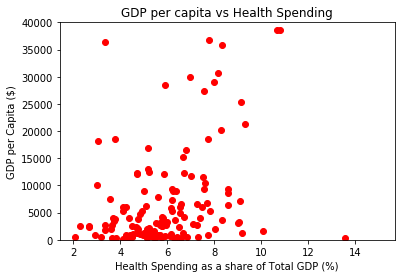

In [46]:
## Analysing datas : within data or combining the data
gdpc_scatter = final_data ['gcmean']
hspend_scatter = final_data ['hmean']
fig,ax = plt.subplots()
ax.scatter (hspend_scatter, gdpc_scatter, color = "r")
plt.ylabel ('GDP per Capita ($)')
plt.xlabel ('Health Spending as a share of Total GDP (%)')
plt.title ('GDP per capita vs Health Spending')
plt.ylim(0,40000)
plt.show()

**Relationship between Food Supply and GDP per Capita**

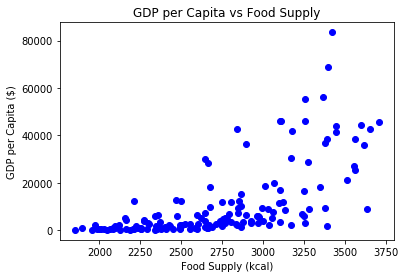

In [47]:
gdpc_scatter = final_data ['gcmean']
calories_scatter = final_data ['cmean']
fig,ax = plt.subplots()
ax.scatter (calories_scatter, gdpc_scatter, color = "b")
plt.ylabel ('GDP per Capita ($)')
plt.xlabel ('Food Supply (kcal)')
plt.title ('GDP per Capita vs Food Supply')
plt.show()

**Relationship between Food Supply and Health Spending**

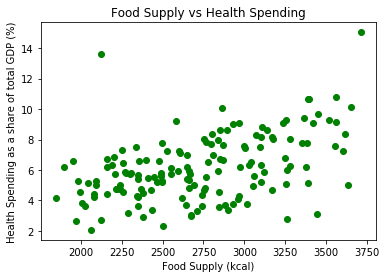

In [48]:
calories_scatter = final_data ['cmean']
hspend_scatter = final_data ['hmean']
fig,ax = plt.subplots()
ax.scatter (calories_scatter, hspend_scatter, color = "g")
plt.xlabel ('Food Supply (kcal)')
plt.ylabel ('Health Spending as a share of total GDP (%)')
plt.title ('Food Supply vs Health Spending')
plt.show()

**Interpretation of this section:**

**Relationship between the Health Spending and GDP per Capita:**
With no regard to the year, there is no clear relationship between health spending as a share of total gdp and gdp per capita. Also, as the health spending data is the sum of public and private health spending, it is even hard to get a clear mechanism.  

**Relationship between Food Supply and GDP per Capita:**
For countries with GDP per Capita over the 30000 and 40000 USD, the Food Supply level per day per person is relatively high. But for countries with GDP per capita below that level, it varies a lot.

**Relationship between Food Supply and Health Spending:**
Generally saying, as the health spending as a share of total GDP is high, food supply is high. But as there is a lot of other social factors affecting these variables, this tendency is not so clear.

## 2.2 Analysis based on the Region

In this part, we will see how the each variables changes in each region as the time goes. As a representitive value of each region, we will use mean variable of each columns.

**Sorting Countries by the Region**

In [49]:
#Label countries by region
countries=pd.read_excel('../dataproject/Countries world.xlsx')
countries.drop(countries.columns[2:],axis=1,inplace=True)
n_countries=countries.copy()

In [50]:
#Create two lists, one with the Countries and the other the Region:
list_countries=list(n_countries['Country'])
#Getting rid of all the spaces
list_countries=[x.strip(' ') for x in list_countries]
list_regions=list(n_countries['Region'])
#Getting rid of all the spaces
list_regions=[y.strip(' ') for y in list_regions]

In [51]:
#Creating a dataframe out of the 2 lists
df_countries_regions=pd.DataFrame({'country':list_countries, 'region':list_regions})
#Merge the data with the Regions Dataframe
region_merge=pd.merge(df_countries_regions,final_data, how='inner', on=['country'])
F_region_merge = region_merge.copy()

In [52]:
#Group contries by region
r_data = F_region_merge.groupby('region').mean()
f_r_data = r_data.copy()

**GDP per Capita in each region**

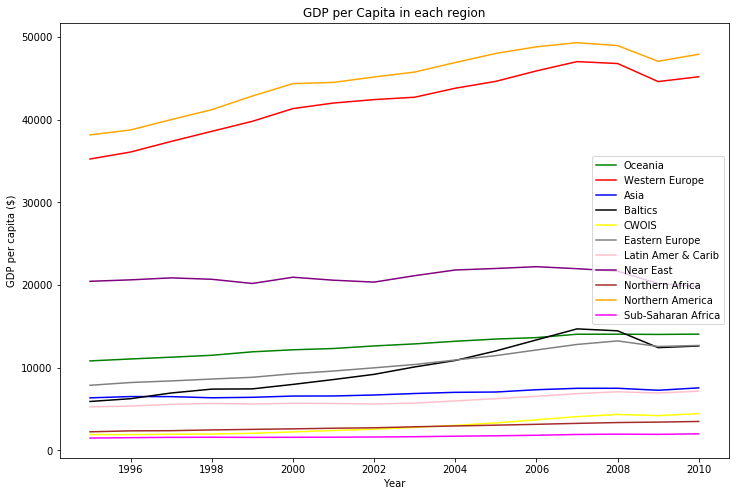

In [53]:
# Subsetting the data set before making the graph
gdpc_t = f_r_data.loc[:,'gc1995':'gc2010']

# Generate the variable of year to be in x-axis
x3 = [1995, 1996, 1997, 1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

# Plot the data by region
plt.figure(figsize=(12,8))
plt.plot(x3, gdpc_t.loc['OCEANIA',:], color = 'green', label = 'Oceania')
plt.plot(x3, gdpc_t.loc['WESTERN EUROPE',:], color = 'red', label = 'Western Europe' )
plt.plot(x3, gdpc_t.loc['ASIA (EX. NEAR EAST)',:], color = 'blue', label = 'Asia')
plt.plot(x3, gdpc_t.loc['BALTICS',:], color = 'black', label = 'Baltics')
plt.plot(x3, gdpc_t.loc['C.W. OF IND. STATES',:], color = 'yellow', label = 'CWOIS')
plt.plot(x3, gdpc_t.loc['EASTERN EUROPE',:], color = 'grey', label = 'Eastern Europe')
plt.plot(x3, gdpc_t.loc['LATIN AMER. & CARIB',:], color = 'pink', label = 'Latin Amer & Carib')
plt.plot(x3, gdpc_t.loc['NEAR EAST',:], color = 'purple', label = 'Near East')
plt.plot(x3, gdpc_t.loc['NORTHERN AFRICA',:], color = 'brown', label = 'Northern Africa')
plt.plot(x3, gdpc_t.loc['NORTHERN AMERICA',:], color = 'orange', label = 'Northern America')
plt.plot(x3, gdpc_t.loc['SUB-SAHARAN AFRICA',:], color = 'fuchsia', label = 'Sub-Saharan Africa')
plt.legend()

# Assign the names of the axis
plt.xlabel ('Year')
plt.ylabel ('GDP per capita ($)')
plt.title ('GDP per Capita in each region')

plt.show()

**Food Supply status in each region**

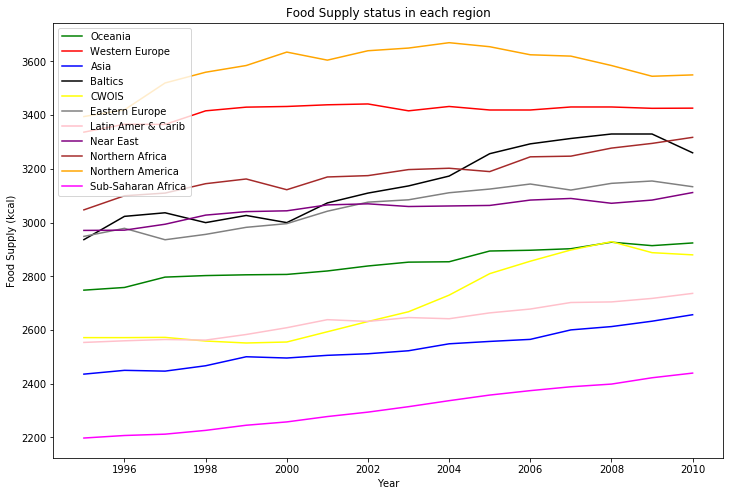

In [54]:
# Subsetting the data set before making the graph
calories_t = f_r_data.loc[:,'c1995':'c2010']

# Generate the variable of year to be in x-axis
x = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

# Plot the data by region
plt.figure(figsize=(12,8))
plt.plot(x, calories_t.loc['OCEANIA',:], color = 'green', label = 'Oceania')
plt.plot(x, calories_t.loc['WESTERN EUROPE',:], color = 'red', label = 'Western Europe' )
plt.plot(x, calories_t.loc['ASIA (EX. NEAR EAST)',:], color = 'blue', label = 'Asia')
plt.plot(x, calories_t.loc['BALTICS',:], color = 'black', label = 'Baltics')
plt.plot(x, calories_t.loc['C.W. OF IND. STATES',:], color = 'yellow', label = 'CWOIS')
plt.plot(x, calories_t.loc['EASTERN EUROPE',:], color = 'grey', label = 'Eastern Europe')
plt.plot(x, calories_t.loc['LATIN AMER. & CARIB',:], color = 'pink', label = 'Latin Amer & Carib')
plt.plot(x, calories_t.loc['NEAR EAST',:], color = 'purple', label = 'Near East')
plt.plot(x, calories_t.loc['NORTHERN AFRICA',:], color = 'brown', label = 'Northern Africa')
plt.plot(x, calories_t.loc['NORTHERN AMERICA',:], color = 'orange', label = 'Northern America')
plt.plot(x, calories_t.loc['SUB-SAHARAN AFRICA',:], color = 'fuchsia', label = 'Sub-Saharan Africa')
plt.legend()

# Assign the names of the axis
plt.xlabel ('Year')
plt.ylabel ('Food Supply (kcal)')
plt.title ('Food Supply status in each region')

plt.show()

**Health Spending status in each region**

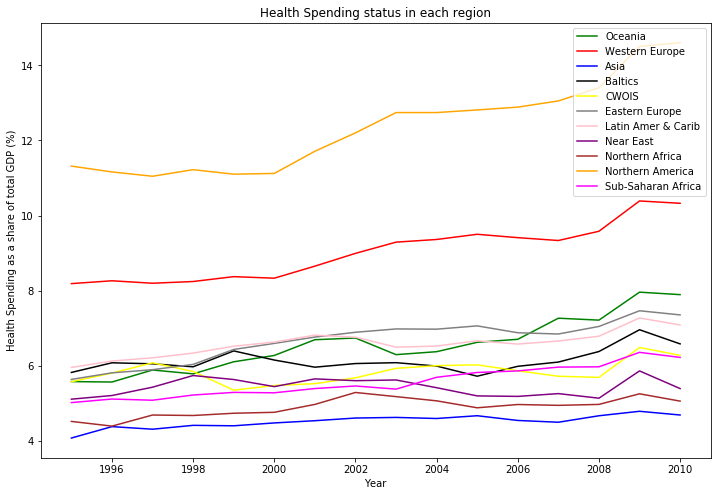

In [55]:
# Subsetting the data set before making the graph
hspend_t = f_r_data.loc[:,'h1995':'h2010']

# Generate the variable of year to be in x-axis
x2 = [1995, 1996, 1997, 1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

# Plot the data by region
plt.figure(figsize=(12,8))
plt.plot(x2, hspend_t.loc['OCEANIA',:], color = 'green', label = 'Oceania')
plt.plot(x2, hspend_t.loc['WESTERN EUROPE',:], color = 'red', label = 'Western Europe' )
plt.plot(x2, hspend_t.loc['ASIA (EX. NEAR EAST)',:], color = 'blue', label = 'Asia')
plt.plot(x2, hspend_t.loc['BALTICS',:], color = 'black', label = 'Baltics')
plt.plot(x2, hspend_t.loc['C.W. OF IND. STATES',:], color = 'yellow', label = 'CWOIS')
plt.plot(x2, hspend_t.loc['EASTERN EUROPE',:], color = 'grey', label = 'Eastern Europe')
plt.plot(x2, hspend_t.loc['LATIN AMER. & CARIB',:], color = 'pink', label = 'Latin Amer & Carib')
plt.plot(x2, hspend_t.loc['NEAR EAST',:], color = 'purple', label = 'Near East')
plt.plot(x2, hspend_t.loc['NORTHERN AFRICA',:], color = 'brown', label = 'Northern Africa')
plt.plot(x2, hspend_t.loc['NORTHERN AMERICA',:], color = 'orange', label = 'Northern America')
plt.plot(x2, hspend_t.loc['SUB-SAHARAN AFRICA',:], color = 'fuchsia', label = 'Sub-Saharan Africa')
plt.legend()

# Assign the names of the axis
plt.xlabel ('Year')
plt.ylabel ('Health Spending as a share of total GDP (%)')
plt.title ('Health Spending status in each region')

plt.show()

**Interpretation of this section**

**GDP per Capita in each region:**
Before financial crisis in 2007, the countries with GDP per capita above 30,000 USD per year (fx.Northern America, Western Europe) had increasing income level as the time goes. But right after the crisis there was a decrease in the income level for these countries, but shortly they recoverd their income growth rate in a positive way. The countries with GDP per capita below 30,000 USD per year, the income level stayed stable throughout the whole period of time, except for Baltics: Baltics had a similar tendency of income change as the countries with GDP per captia above 30,000 USD per year.

**Food Supply status in each region:**
Until 2004, Northern america had a slight increase in Food Supply. After that, the region had slight decrease in Food Supply. In the case of Western Europe, Food Supply level remained constant. For the rest of the region, Food Supply level increased over the whole time period with different growth rate.

**Health spending status in each region:**
All regions had increasing health spending over the time period more or less. Especially, Northern America, where the initial health spending is the highest of all the regions in 1995, had highest growth rate than any other regions after 2000. However, Asia has the lowest health spending in overall time period with very slight growth.

## 2.3. Analysis on individual countries

In this part, we will work on how the values for each country changes. The size of the dot means GDP per Capita for each year.

**Analysis on how Health Spending and GDP per capita changes over the years** 

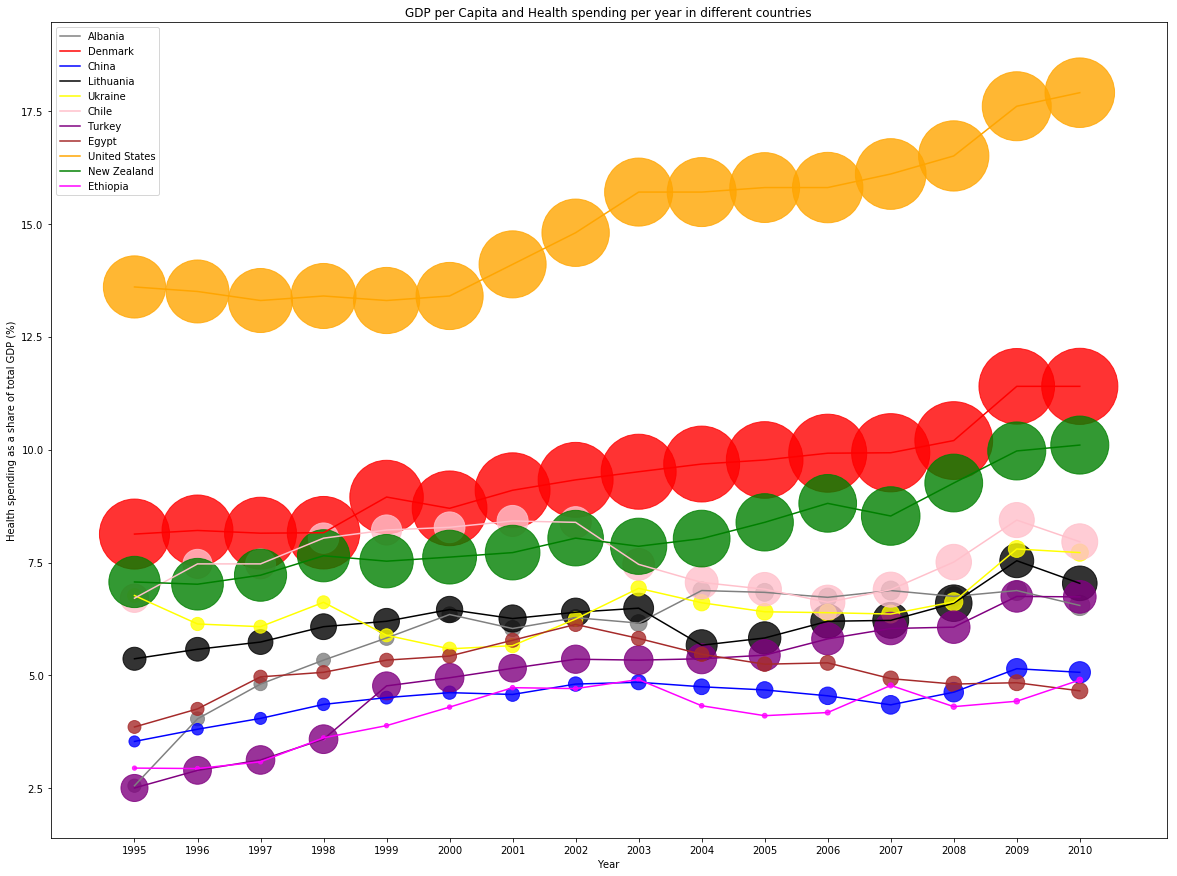

In [56]:
#FIGURE 1 -->
plt.figure(figsize=(20,15))

#Chaning index into the name of the country// using T to transpose the table
NF_gdpc = N_gdpc.set_index("country")
F_gdpcT = NF_gdpc.T
NF_hspend = N_hspend.set_index("country")
F_hspendT = NF_hspend.T

#Adding Year column
F_gdpcT['year'] = F_gdpcT.index
F_hspendT['year'] = F_gdpcT.index

#Get year, gdp for one country, hspend for one country: ALBANIA (EASTERN EUROPE)
YearEE = F_hspendT['year']
EE = F_hspendT['Albania']
ee = np.array(F_gdpcT['Albania'])/10

#Get year, gdp for one country, hspend for one country: DENMARK (WESTERN EUROPE)
YearWE = F_hspendT['year']
WE = F_hspendT['Denmark']
we = np.array(F_gdpcT['Denmark'])/10

#Get year, gdp for one country, hspend for one country: CHINA (ASIA (EX. NEAR EAST))
YearAE = F_hspendT['year']
AE = F_hspendT['China']
ae = np.array(F_gdpcT['China'])/10

#Get year, gdp for one country, hspend for one country: LITHUANIA (BALTICS)
YearB = F_hspendT['year']
B = F_hspendT['Lithuania']
b = np.array(F_gdpcT['Lithuania'])/10

#Get year, gdp for one country, hspend for one country: UKRAINE (C.W OF IND. STATES)
YearI = F_hspendT['year']
I = F_hspendT['Ukraine']
i = np.array(F_gdpcT['Ukraine'])/10

#Get year, gdp for one country, hspend for one country: CHILE (LATIN AMER. & CARIB)
YearLA = F_hspendT['year']
LA = F_hspendT['Chile']
la = np.array(F_gdpcT['Chile'])/10

#Get year, gdp for one country, hspend for one country: TURKEY (NEAR EAST)
YearNE = F_hspendT['year']
NE = F_hspendT['Turkey']
ne = np.array(F_gdpcT['Turkey'])/10

#Get year, gdp for one country, hspend for one country: EGYPT (NORTHERN AFRICA)
YearNA = F_hspendT['year']
NA = F_hspendT['Egypt']
na = np.array(F_gdpcT['Egypt'])/10

#Get year, gdp for one country, hspend for one country: UNITED STATES (NORTHERN AMERICA)
YearNAM = F_hspendT['year']
NAM = F_hspendT['United States']
nam = np.array(F_gdpcT['United States'])/10

#Get year, gdp for one country, hspend for one country: NEW ZEALAND (OCEANIA)
YearO = F_hspendT['year']
O = F_hspendT['New Zealand']
o = np.array(F_gdpcT['New Zealand'])/10

#Get year, gdp for one country, hspend for one country: ETHIOPIA (SUB-SAHARAN AFRICA)
YearSA = F_hspendT['year']
SA = F_hspendT['Ethiopia']
sa = np.array(F_gdpcT['Ethiopia'])/10

#plotting the plot
plt.plot(YearEE, EE, color='grey')
plt.plot(YearWE, WE, color='red')
plt.plot(YearAE, AE, color='blue')
plt.plot(YearB, B, color='black')
plt.plot(YearI, I, color='yellow')
plt.plot(YearLA, LA, color='pink')
plt.plot(YearNE, NE, color='purple')
plt.plot(YearNA, NA, color='brown')
plt.plot(YearNAM, NAM, color='orange')
plt.plot(YearO, O, color='green')
plt.plot(YearSA, SA, color='fuchsia')

#Adding the legend
plt.legend()


#plotting the scatter
plt.scatter(YearEE, EE, color='grey', s=ee, alpha=0.8)
plt.scatter(YearWE, WE, color='red', s=we, alpha=0.8)
plt.scatter(YearAE, AE, color='blue', s=ae, alpha=0.8)
plt.scatter(YearB, B, color='black', s=b, alpha=0.8)
plt.scatter(YearI, I, color='yellow', s=i, alpha=0.8)
plt.scatter(YearLA, LA, color='pink', s=la, alpha=0.8)
plt.scatter(YearNE, NE, color='purple', s=ne, alpha=0.8)
plt.scatter(YearNA, NA, color='brown', s=na, alpha=0.8)
plt.scatter(YearNAM, NAM, color='orange', s=nam, alpha=0.8)
plt.scatter(YearO, O, color='green', s=o, alpha=0.8)
plt.scatter(YearSA, SA, color='fuchsia', s=sa, alpha=0.8)

#customizing
plt.xticks(['gc1995', 'gc1996', 'gc1997', 'gc1998', 'gc1999', 'gc2000', 'gc2001', 'gc2002', 'gc2003', 'gc2004', 'gc2005', 'gc2006', 'gc2007', 'gc2008', 'gc2009', 'gc2010'],
           ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'])

plt.title('GDP per Capita and Health spending per year in different countries')
plt.xlabel('Year')
plt.ylabel('Health spending as a share of total GDP (%)')

#showing
plt.show()

**Analysis on how Food Supply and GDP per capita changes over the years** 

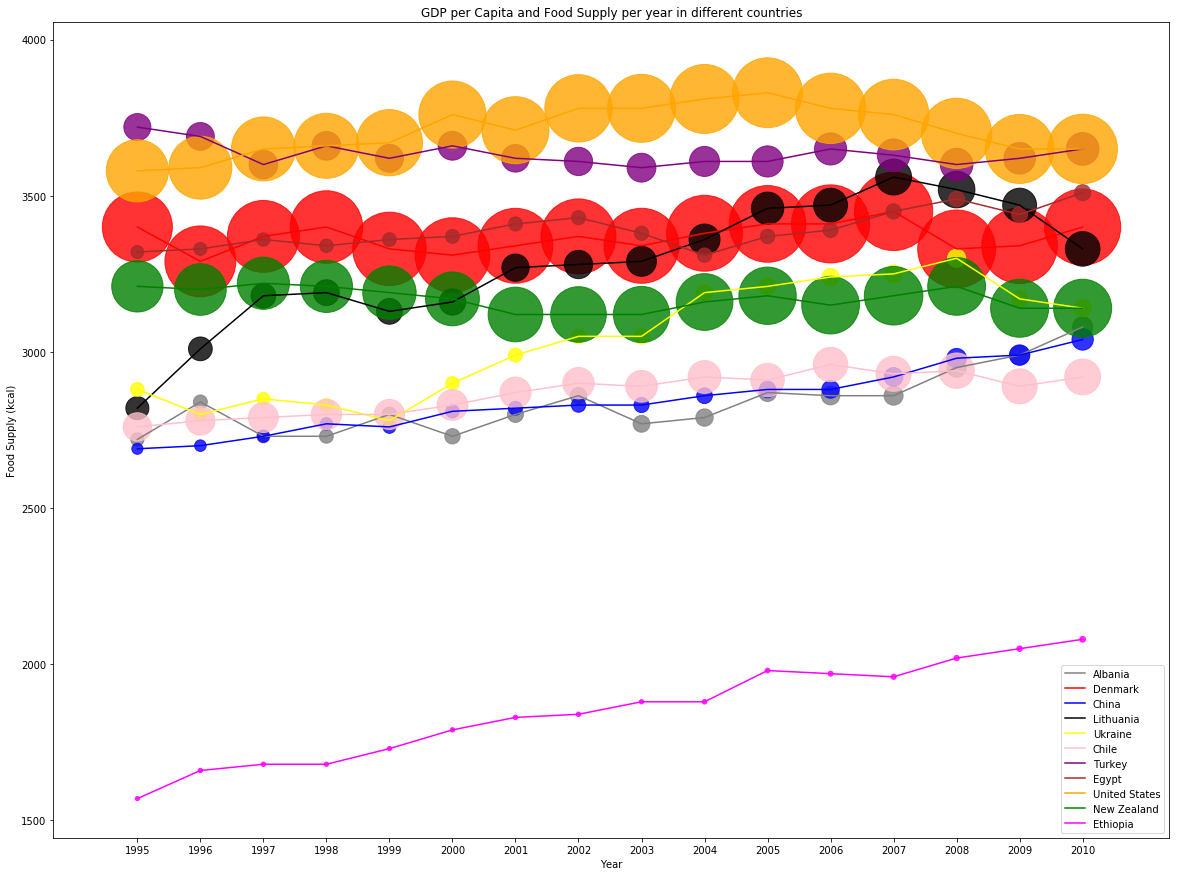

In [57]:
#FIGURE 2 -->
plt.figure(figsize=(20,15))

#Chaning index into the name of the country// using T to transpose the table
NF_gdpc = N_gdpc.set_index("country")
F_gdpcT = NF_gdpc.T
NF_calories = N_calories.set_index("country")
F_caloriesT = NF_calories.T

#Adding Year column
F_gdpcT['year'] = F_gdpcT.index
F_caloriesT['year'] = F_gdpcT.index

#Get year, gdp for one country, calories for one country: ALBANIA (EASTERN EUROPE)
YearEE = F_caloriesT['year']
EE = F_caloriesT['Albania']
ee = np.array(F_gdpcT['Albania'])/10

#Get year, gdp for one country, calories for one country: DENMARK (WESTERN EUROPE)
YearWE = F_caloriesT['year']
WE = F_caloriesT['Denmark']
we = np.array(F_gdpcT['Denmark'])/10

#Get year, gdp for one country, calories for one country: CHINA (ASIA (EX. NEAR EAST))
YearAE = F_caloriesT['year']
AE = F_caloriesT['China']
ae = np.array(F_gdpcT['China'])/10

#Get year, gdp for one country, calories for one country: LITHUANIA (BALTICS)
YearB = F_caloriesT['year']
B = F_caloriesT['Lithuania']
b = np.array(F_gdpcT['Lithuania'])/10

#Get year, gdp for one country, calories for one country: UKRAINE (C.W OF IND. STATES)
YearI = F_caloriesT['year']
I = F_caloriesT['Ukraine']
i = np.array(F_gdpcT['Ukraine'])/10

#Get year, gdp for one country, calories for one country: CHILE (LATIN AMER. & CARIB)
YearLA = F_caloriesT['year']
LA = F_caloriesT['Chile']
la = np.array(F_gdpcT['Chile'])/10

#Get year, gdp for one country, calories for one country: TURKEY (NEAR EAST)
YearNE = F_caloriesT['year']
NE = F_caloriesT['Turkey']
ne = np.array(F_gdpcT['Turkey'])/10

#Get year, gdp for one country, calories for one country: EGYPT (NORTHERN AFRICA)
YearNA = F_caloriesT['year']
NA = F_caloriesT['Egypt']
na = np.array(F_gdpcT['Egypt'])/10

#Get year, gdp for one country, calories for one country: UNITED STATES (NORTHERN AMERICA)
YearNAM = F_caloriesT['year']
NAM = F_caloriesT['United States']
nam = np.array(F_gdpcT['United States'])/10

#Get year, gdp for one country, calories for one country: NEW ZEALAND (OCEANIA)
YearO = F_caloriesT['year']
O = F_caloriesT['New Zealand']
o = np.array(F_gdpcT['New Zealand'])/10

#Get year, gdp for one country, calories for one country: ETHIOPIA (SUB-SAHARAN AFRICA)
YearSA = F_caloriesT['year']
SA = F_caloriesT['Ethiopia']
sa = np.array(F_gdpcT['Ethiopia'])/10

#plotting the plot
plt.plot(YearEE, EE, color='grey')
plt.plot(YearWE, WE, color='red')
plt.plot(YearAE, AE, color='blue')
plt.plot(YearB, B, color='black')
plt.plot(YearI, I, color='yellow')
plt.plot(YearLA, LA, color='pink')
plt.plot(YearNE, NE, color='purple')
plt.plot(YearNA, NA, color='brown')
plt.plot(YearNAM, NAM, color='orange')
plt.plot(YearO, O, color='green')
plt.plot(YearSA, SA, color='fuchsia')

#Adding the legend
plt.legend()

#plotting the scatter
plt.scatter(YearEE, EE, color='grey', s=ee, alpha=0.8)
plt.scatter(YearWE, WE, color='red', s=we, alpha=0.8)
plt.scatter(YearAE, AE, color='blue', s=ae, alpha=0.8)
plt.scatter(YearB, B, color='black', s=b, alpha=0.8)
plt.scatter(YearI, I, color='yellow', s=i, alpha=0.8)
plt.scatter(YearLA, LA, color='pink', s=la, alpha=0.8)
plt.scatter(YearNE, NE, color='purple', s=ne, alpha=0.8)
plt.scatter(YearNA, NA, color='brown', s=na, alpha=0.8)
plt.scatter(YearNAM, NAM, color='orange', s=nam, alpha=0.8)
plt.scatter(YearO, O, color='green', s=o, alpha=0.8)
plt.scatter(YearSA, SA, color='fuchsia', s=sa, alpha=0.8)

#Customizing
plt.xticks(['gc1995', 'gc1996', 'gc1997', 'gc1998', 'gc1999', 'gc2000', 'gc2001', 'gc2002', 'gc2003', 'gc2004', 'gc2005', 'gc2006', 'gc2007', 'gc2008', 'gc2009', 'gc2010'],
           ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'])

plt.title('GDP per Capita and Food Supply per year in different countries')
plt.xlabel('Year')
plt.ylabel('Food Supply (kcal)')

#Showing
plt.show()

**Interpretation of this section**

**GDP per Capita and Health spending per year in different countries:**
Overall, countries increased their Health spending more or less over the 16 years. Therefore, we can say higher the income level of the country, the higher the health spending. Since health spending is measured as a share of total GDP, the gap of the absolute spending on health between low- and high-income countries is even larger. Egypt and Chile are showing exceptional tendency as they have decreasing health spending after 2002.


**GDP per Capita and Food Supply per year in different countries:**
As we can see from the size of the dots, income level of each country is not closely related to the level of Food Supply: it is less related than income level is with health spending. For the countries with Food Supply over 3,000 kcal a day, the Food Supply stays stable in overall period. Lithuania shows remarkable change: starting as a country with third lowest Food Supply, increasing rapidly until 2007. Of course the country have decreasing Food Supply after 2007 but it was a country with the fourth highest Food Supply in 2010. The food supply in China, Albania and Chile had very similar level and trend: increasing with low growth rate continuously. Ethiopia, where the income level is the lowest in the graph, increased its food supply monotonically over the time period. However, it is still much lower than other seven countries.

# 3. Conclusion

> Generally, there is a positive relationship between income level and etiher food supply or health spending. Also, growth rate of health spending and food supply had a negative relationship with the income level of the country: high-income countries have rather stable graph and low-income countries have rather fluctuating graph.

> As the difference shown above between the graphs in general analysis and those in analysis on individual countries, it is difficult to retrieve accurate and clear correlation among the variables without any consideration on the year. In other words, median and mean value of each country are not the best data for this project.

> Also, the health spending as a share of total gdp is the sum of public and private section. The correlation will be more clear if the data only contain public health spending. 

> Finally, more data on social factors other than economic elements should be combined to redeem the better result.